In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime 

def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return np.where((data > upper_bound)|(data < lower_bound))

raw = pd.read_csv("2022-04-19.dat", delimiter=" ")
raw['time'] = pd.to_datetime(raw['time'])

outlier_index = outliers_iqr(raw['cm'])[0]
not_outlier_index = []

for i in raw['cm'].index:
    if i not in outlier_index:
        not_outlier_index.append(i)
raw_c = raw.loc[not_outlier_index]
raw_c = raw_c.reset_index(drop=True)

raw_cc = raw_c.drop_duplicates(['time'])

index = raw_cc['time']
range = raw_cc['cm'].to_numpy()
series = pd.Series(range, index=index)
data_final = pd.DataFrame({'cm': series})



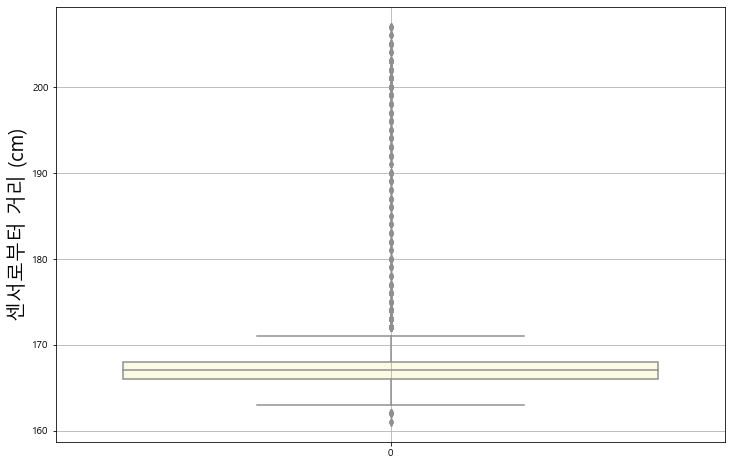

In [2]:
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12,8))
sns.boxplot(data=raw['cm'], color='lightyellow')
plt.ylabel("센서로부터 거리 (cm)", fontsize=20)
plt.grid()
plt.savefig(r"X:\우창욱\IQR.png")
plt.show()

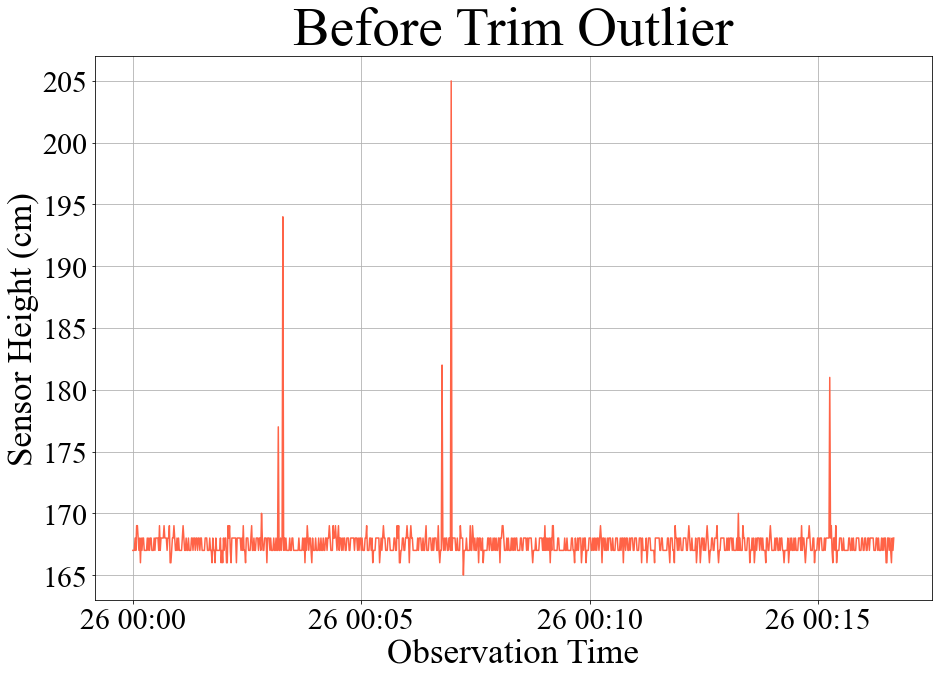

In [22]:
### raw 데이터 플롯

fontdict = {
    'family': 'Times New Roman',
    'size': 15,
    'weight': 'normal',
}

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(15, 10))
plt.grid()
plt.yticks(fontsize=30, fontname="Times New Roman")
plt.xticks(fontsize=30, fontname="Times New Roman")
plt.title("Before Trim Outlier", fontsize=55, fontdict=fontdict)
plt.ylabel("Sensor Height (cm)", fontsize=35, fontdict=fontdict)
plt.xlabel("Observation Time", fontsize=35, fontdict=fontdict)
plt.plot(raw['time'][:1000], raw['cm'][:1000], color="tomato")
# plt.plot(data_final.index[:1000], data_final['cm'][:1000] , color="dodgerblue", alpha=0.5)



plt.savefig(r"X:\우창욱\이상치 제거 전.png")


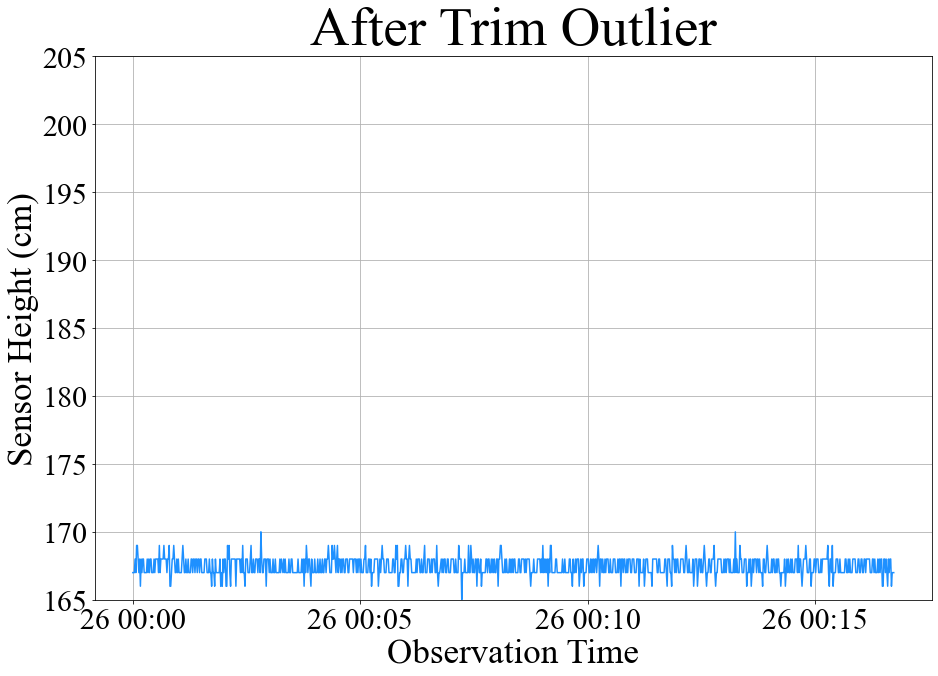

In [19]:
### 이상치 제거 플롯
fontdict = {
    'family': 'Times New Roman',
    'size': 15,
    'weight': 'normal',
}

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(15, 10))
plt.plot(data_final.index[:1000], data_final['cm'][:1000] , color="dodgerblue")

plt.grid()
plt.ylim(165, 205)
plt.yticks(fontsize=30, fontname="Times New Roman")
plt.xticks(fontsize=30, fontname="Times New Roman")
plt.title("After Trim Outlier", fontsize=55, fontdict=fontdict)
plt.ylabel("Sensor Height (cm)", fontsize=35, fontdict=fontdict)
plt.xlabel("Observation Time", fontsize=35, fontdict=fontdict)
plt.savefig(r"X:\우창욱\이상치 제거 후.png")

plt.show()

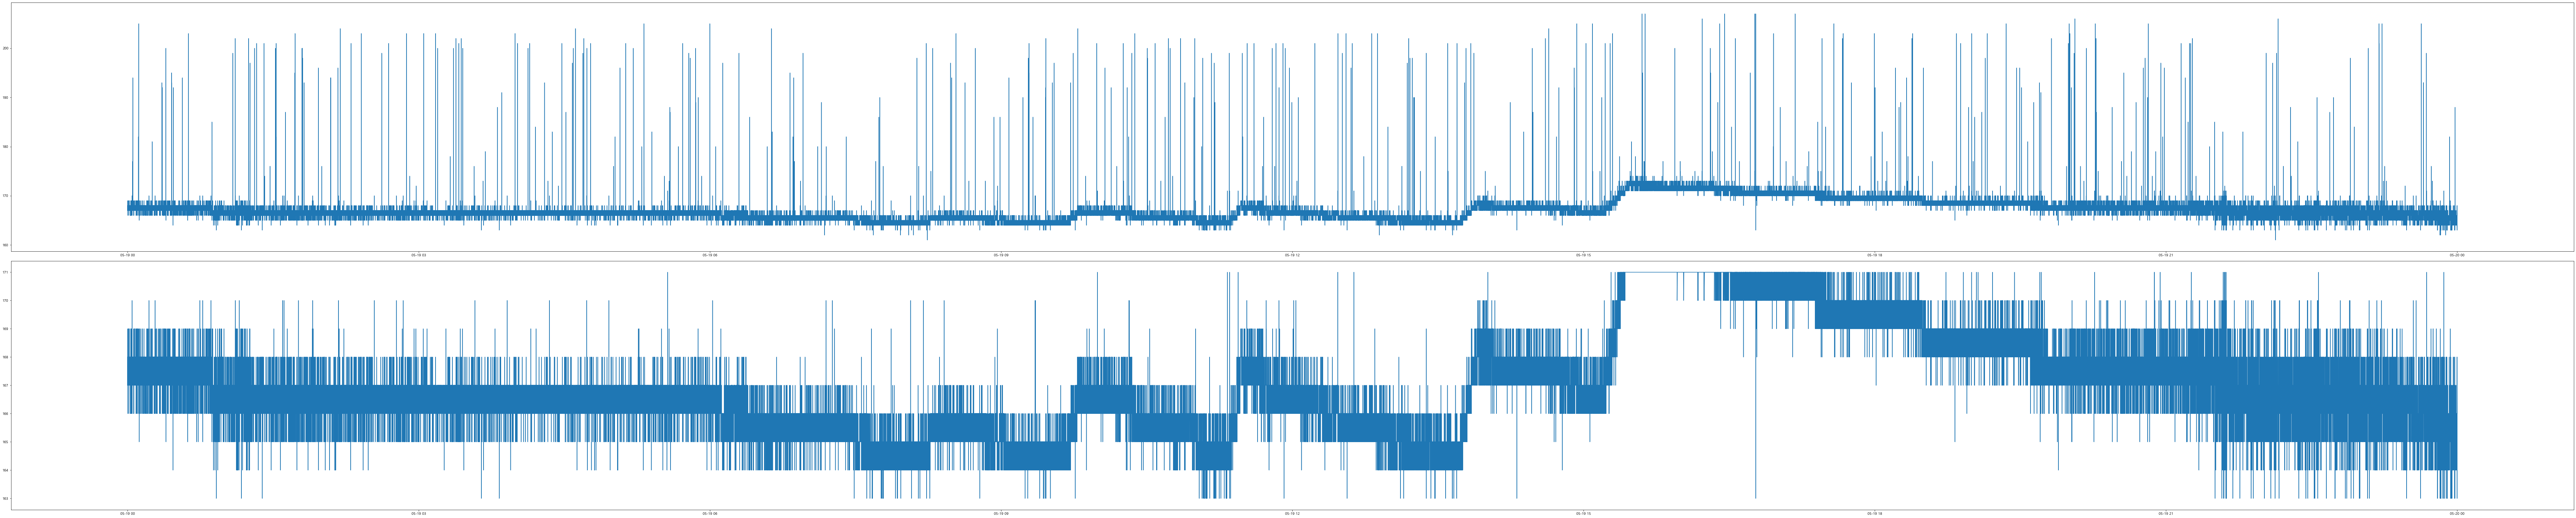

In [9]:
### raw 데이터 플롯
plt.figure(figsize=(100, 30))
plt.subplot(3, 1, 1)
plt.plot(raw['time'][:100], raw['cm'][:100])

# ### 이상치 플롯
# plt.subplot(3, 1, 2)
# sns.boxplot(data=raw['mm'], color='blue')

### 이상치 제거 플롯
plt.subplot(3, 1, 2)
plt.plot(data_final.index, data_final['cm'])

plt.tight_layout()
plt.savefig(r"X:\우창욱\이상치 제거 전 후.png")
plt.show()


In [24]:
import datetime
import pandas as pd
import numpy as np
import scipy.stats as stats

minute_5_mode = data_final.resample("5T").apply({'cm':lambda x: stats.mode(x)[0]})
minute_5_mode = pd.DataFrame(minute_5_mode)
minute_5_mode.to_csv("2022-04-19-5min_mode.csv")
minute_5_mode

,cm
time,
2022-05-26 00:00:00,167
2022-05-26 00:05:00,167
2022-05-26 00:10:00,167
2022-05-26 00:15:00,168
2022-05-26 00:20:00,167
...,...
2022-05-26 23:35:00,166
2022-05-26 23:40:00,166
2022-05-26 23:45:00,166


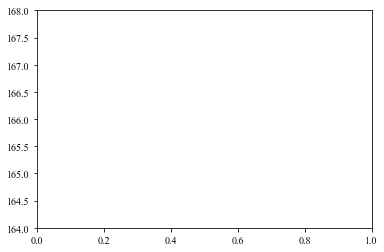

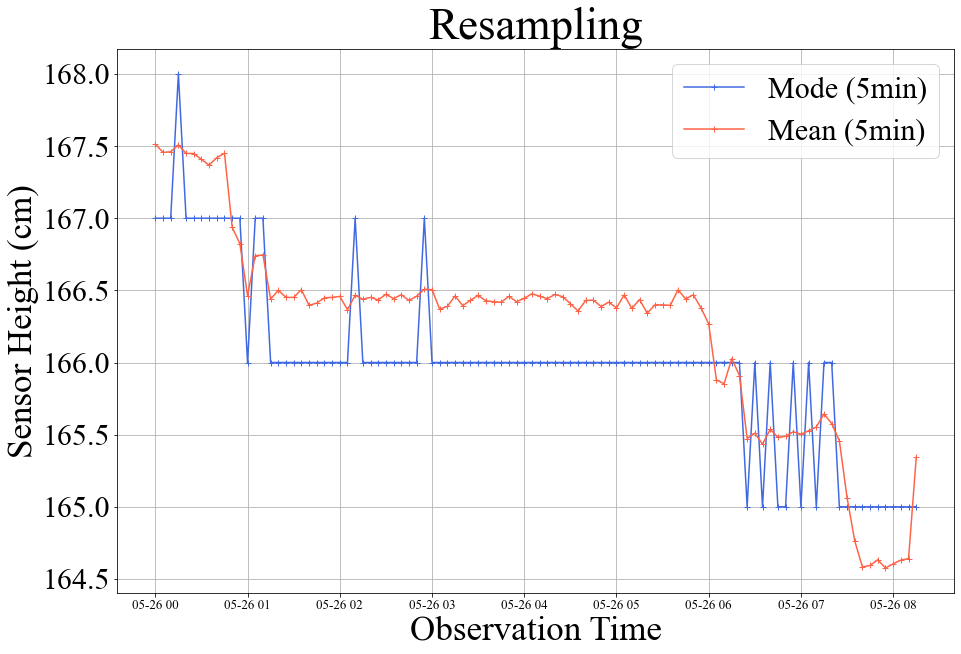

In [51]:
# 운영체제별 한글 폰트 설정


fontdict = {
    'family': 'Times New Roman',
    'size': 15,
    'weight': 'normal',
}

plt.rcParams['font.family'] = 'Times New Roman'


plt.ylim(164, 168)
plt.figure(figsize=(15,10))
plt.plot(minute_5_mode.index[:100], minute_5_mode['cm'][:100], color="royalblue", marker="+", label="Mode (5min)")
plt.plot(minute_5_data.index[:100], minute_5_data['cm'][:100], color="tomato", marker="+", label="Mean (5min)")

plt.title("Resampling", fontsize=45)

plt.yticks(fontsize=30, fontname="Times New Roman")
plt.xticks(fontsize=13, fontname="Times New Roman")
plt.ylabel('Sensor Height (cm)', fontsize=35, fontdict=fontdict)
plt.xlabel('Observation Time', fontsize=35, fontdict=fontdict)
plt.legend(fontsize=30)
plt.grid()
plt.savefig(r"X:\우창욱\5분 리샘플링 최빈값, 평균값.png")
# plt.savefig("2022-04-19-5min-mode.png")

In [28]:
## resample
minute_5_data = data_final['cm'].resample('5T').mean()
# minute_5_data
minute_5_data = pd.DataFrame(minute_5_data)
minute_5_data.to_csv("2022-04-19-5min_mean.csv")
minute_5_data




,cm
time,
2022-05-26 00:00:00,167.513423
2022-05-26 00:05:00,167.456376
2022-05-26 00:10:00,167.460000
2022-05-26 00:15:00,167.508361
2022-05-26 00:20:00,167.449324
...,...
2022-05-26 23:35:00,166.114478
2022-05-26 23:40:00,165.986532
2022-05-26 23:45:00,165.909091


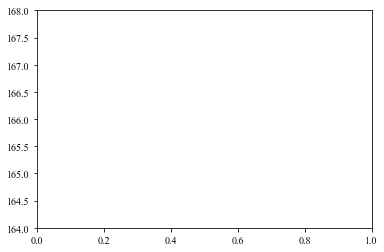

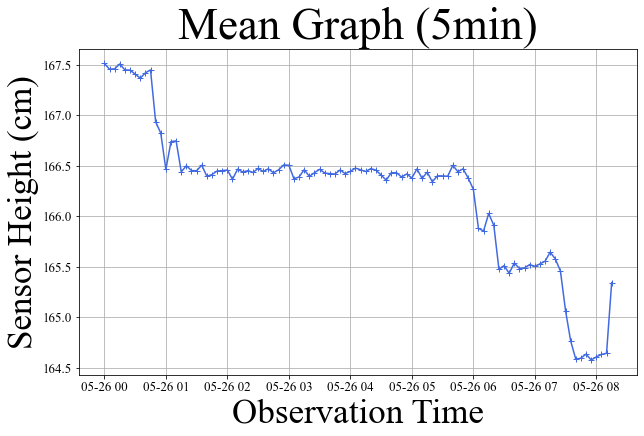

In [42]:

fontdict = {
    'family': 'Times New Roman',
    'size': 15,
    'weight': 'normal',
}

plt.rcParams['font.family'] = 'Times New Roman'


plt.ylim(164, 168)
plt.figure(figsize=(10,6))
plt.plot(minute_5_data.index[:100], minute_5_data['cm'][:100], color="royalblue", marker="+")

plt.title("Mean Graph (5min)", fontsize=45, fontdict=fontdict)
plt.ylabel('Sensor Height (cm)', fontsize=35, fontdict=fontdict)
plt.xlabel('Observation Time', fontsize=35, fontdict=fontdict)
plt.yticks(fontsize=13, fontname="Times New Roman")
plt.xticks(fontsize=13, fontname="Times New Roman")

plt.grid()
plt.savefig(r"X:\우창욱\5분 리샘플링 평균값.png")
# plt.savefig("2022-04-19-5min.png")


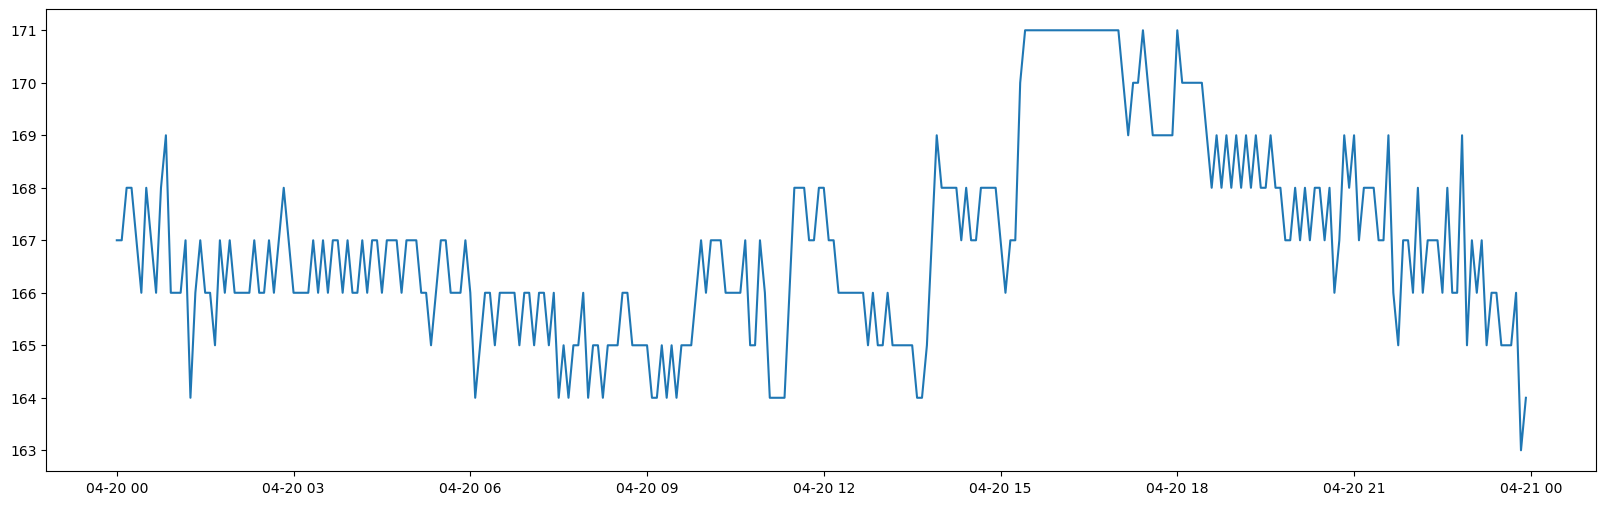

In [15]:
## frequency setting ##
data_plot = data_final.asfreq(freq='300s')
data_plot = data_plot.bfill()
plt.figure(figsize=(20,6))
plt.plot(data_plot.index, data_plot['cm'])
plt.savefig("2022-04-19.png")

In [11]:
data_plot

,cm
time,
2022-04-20 00:00:00,167.0
2022-04-20 00:05:00,167.0
2022-04-20 00:10:00,168.0
2022-04-20 00:15:00,168.0
2022-04-20 00:20:00,167.0
...,...
2022-04-20 23:35:00,165.0
2022-04-20 23:40:00,165.0
2022-04-20 23:45:00,166.0


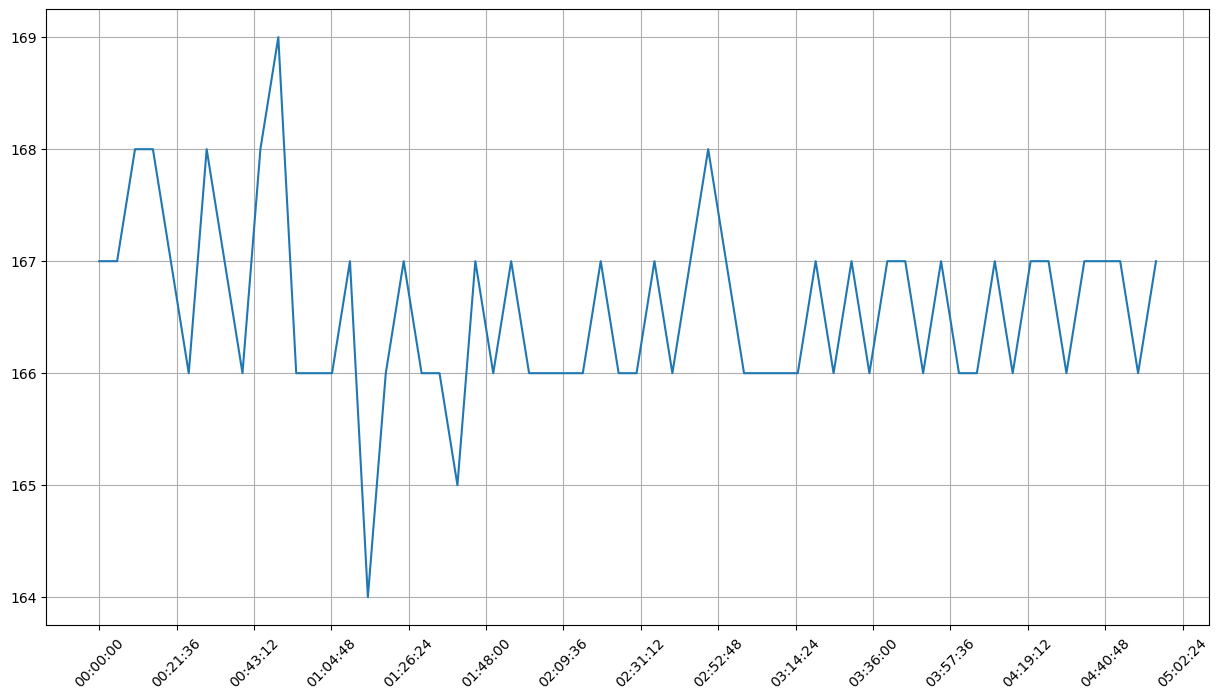

In [9]:
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
plt.style.use(['default'])

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(data_plot[:60].index, data_plot[:60]['cm'])
plt.xticks(rotation=45)
plt.grid()
dateFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_major_locator(MaxNLocator(20))





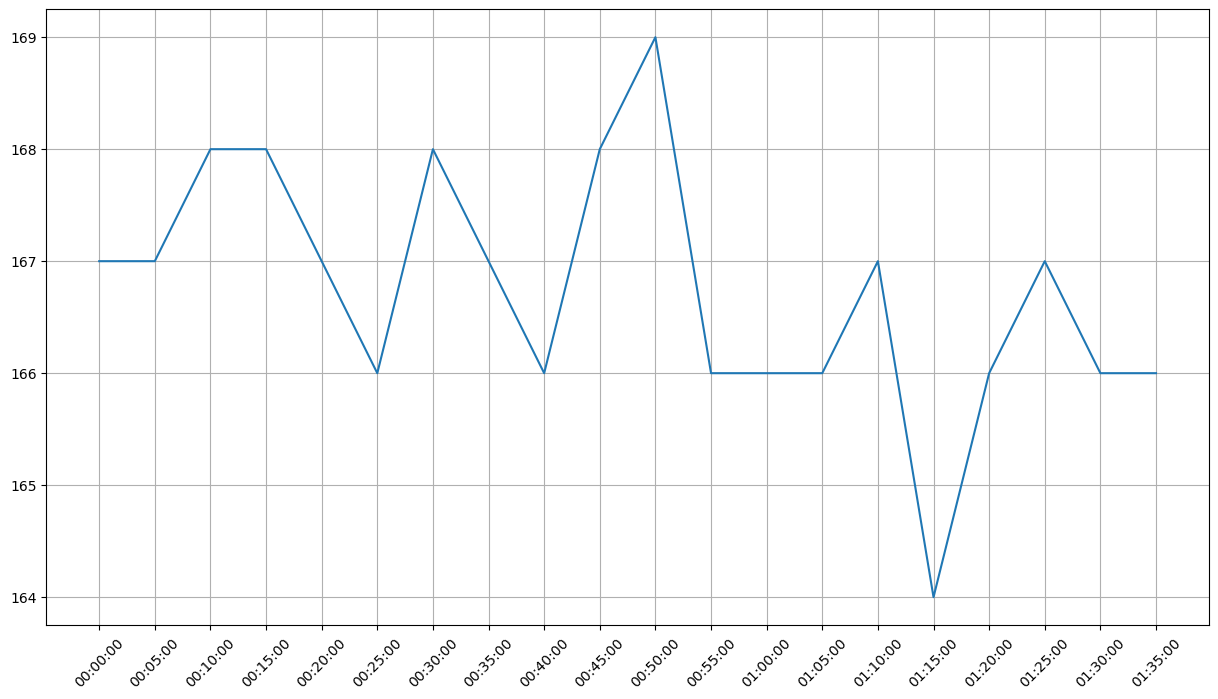

In [10]:
import matplotlib.dates as mdates
from matplotlib import dates
from matplotlib.ticker import MaxNLocator
plt.style.use(['default'])

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(data_plot[:20].index, data_plot[:20]['cm'])
plt.xticks(rotation=45)
plt.grid()
# 시분초로 세팅.
dateFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(dateFmt)
# 5분 간격으로 세팅.
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))





In [86]:
raw = raw.reset_index(drop=True)
raw = raw.drop_duplicates(['time'])
raw

,time,mm
0,2021-09-29 09:49:09,430
1,2021-09-29 09:49:10,430
2,2021-09-29 09:49:11,430
3,2021-09-29 09:49:12,431
4,2021-09-29 09:49:13,399
...,...,...
48644,2021-09-29 23:59:55,429
48645,2021-09-29 23:59:56,429
48646,2021-09-29 23:59:57,429
48647,2021-09-29 23:59:58,428


In [88]:
index_1 = raw['time']
range_1 = raw['mm'].to_numpy()
series_1 = pd.Series(range_1, index=index_1)
raw_series = pd.DataFrame({'mm': series_1})

In [89]:
raw_series

,mm
time,
2021-09-29 09:49:09,430
2021-09-29 09:49:10,430
2021-09-29 09:49:11,430
2021-09-29 09:49:12,431
2021-09-29 09:49:13,399
...,...
2021-09-29 23:59:55,429
2021-09-29 23:59:56,429
2021-09-29 23:59:57,429


In [90]:
raw_series = raw_series.asfreq(freq='300s')
raw_series

,mm
time,
2021-09-29 09:49:09,430.0
2021-09-29 09:54:09,778.0
2021-09-29 09:59:09,438.0
2021-09-29 10:04:09,441.0
2021-09-29 10:09:09,441.0
...,...
2021-09-29 23:39:09,266.0
2021-09-29 23:44:09,428.0
2021-09-29 23:49:09,429.0


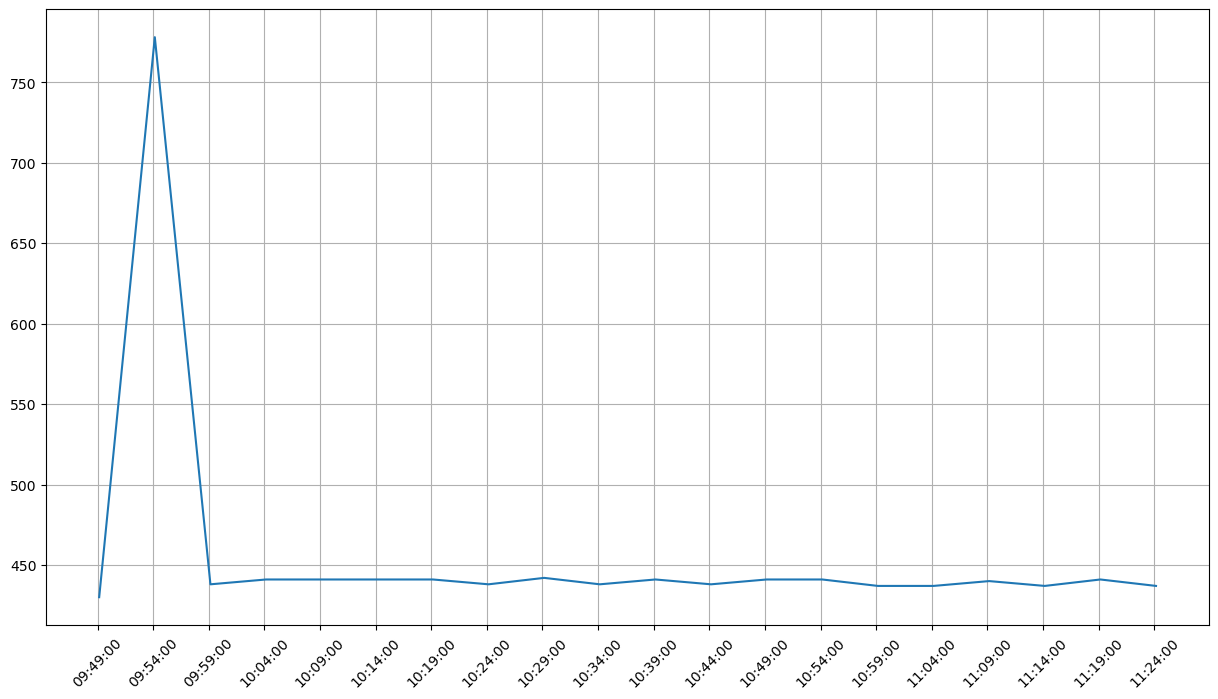

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(raw_series[:20].index, raw_series[:20]['mm'])
plt.xticks(rotation=45)
plt.grid()
# 시분초로 세팅.
dateFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(dateFmt)
# 5분 간격으로 세팅.
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
